# The Sparks Foundation - Data Science & Business Analytics Internship
## Author - Mayur Pokharkar
## Task-3 : " Exploratory Data Analysis - Retail "
### Problem Statement :  Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.  As a business manager, try to find out the weak areas where you can work to make more profit.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("SampleSuperstore.csv")
dataset.head(n=10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
dataset[['Sales', 'Quantity', 'Discount', 'Profit']].max()

Sales       22638.480
Quantity       14.000
Discount        0.800
Profit       8399.976
dtype: float64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
dataset.duplicated().sum()

17

In [7]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

- As there are no null and no duplicate values present we can proceed for visualizations.

### Count plot for each column

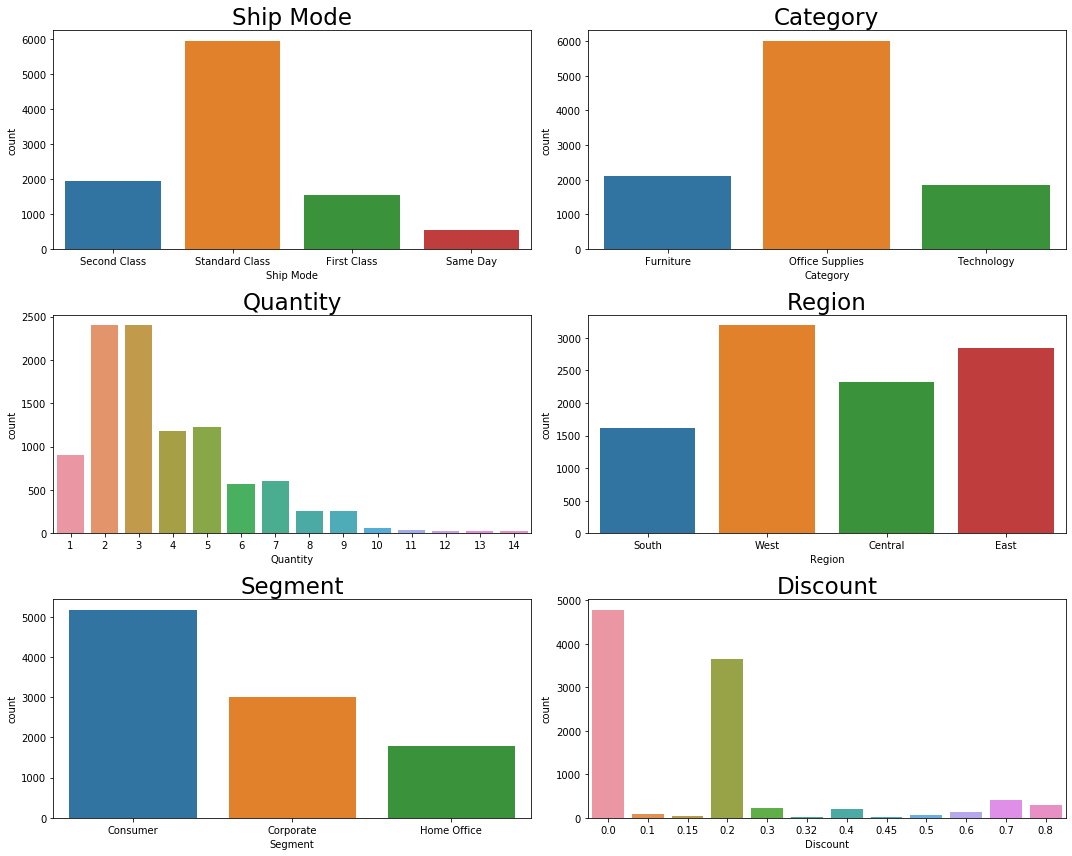

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
sns.countplot(dataset['Ship Mode'], ax=axs[0][0])
axs[0][0].set_title('Ship Mode', fontsize=23)
sns.countplot(dataset['Category'], ax=axs[0][1])
axs[0][1].set_title('Category', fontsize=23)
sns.countplot(dataset['Quantity'], ax=axs[1][0])
axs[1][0].set_title('Quantity', fontsize=23)
sns.countplot(dataset['Region'], ax=axs[1][1])
axs[1][1].set_title('Region', fontsize=23)
sns.countplot(dataset['Segment'], ax=axs[2][0])
axs[2][0].set_title('Segment', fontsize=23)
sns.countplot(dataset['Discount'], ax=axs[2][1])
axs[2][1].set_title('Discount', fontsize=23)
plt.tight_layout()

Text(0.5, 1.0, 'State')

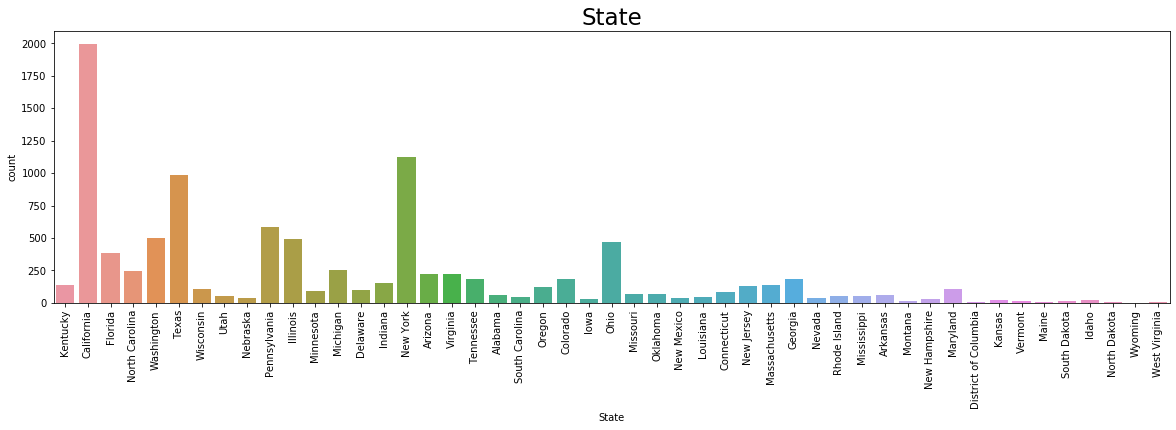

In [9]:
plt.figure(figsize=(20, 5))
sns.countplot(dataset['State'])
plt.xticks(rotation=90)
plt.title('State', fontsize=23)

Text(0.5, 1.0, 'Sub-Category')

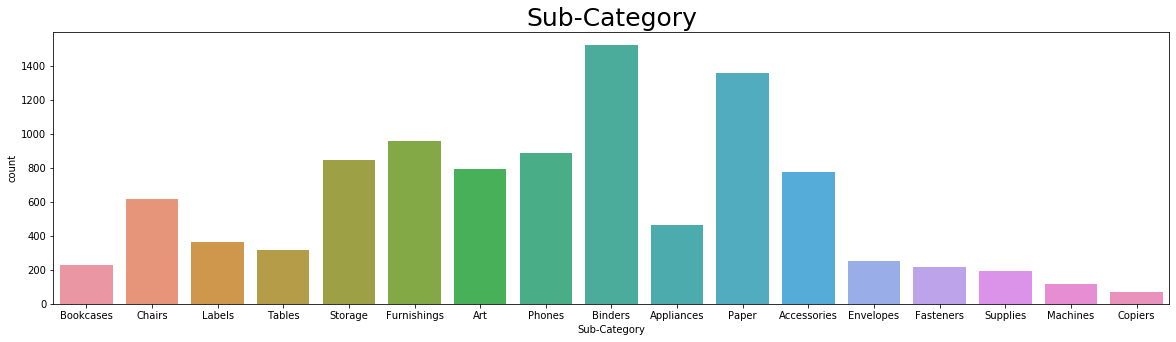

In [10]:
plt.figure(figsize=(20, 5))
sns.countplot(dataset['Sub-Category'])
plt.title('Sub-Category', fontsize=25)

In [11]:
df = pd.DataFrame(dataset['State'].value_counts())
df

,State
California,1996
New York,1127
Texas,983
Pennsylvania,586
Washington,502
Illinois,491
Ohio,468
Florida,383
Michigan,254
North Carolina,249


In [12]:
df.describe()

,State
count,49.000000
mean,203.612245
std,350.395718
min,1.000000
25%,37.000000
50%,82.000000
75%,184.000000
max,1996.000000


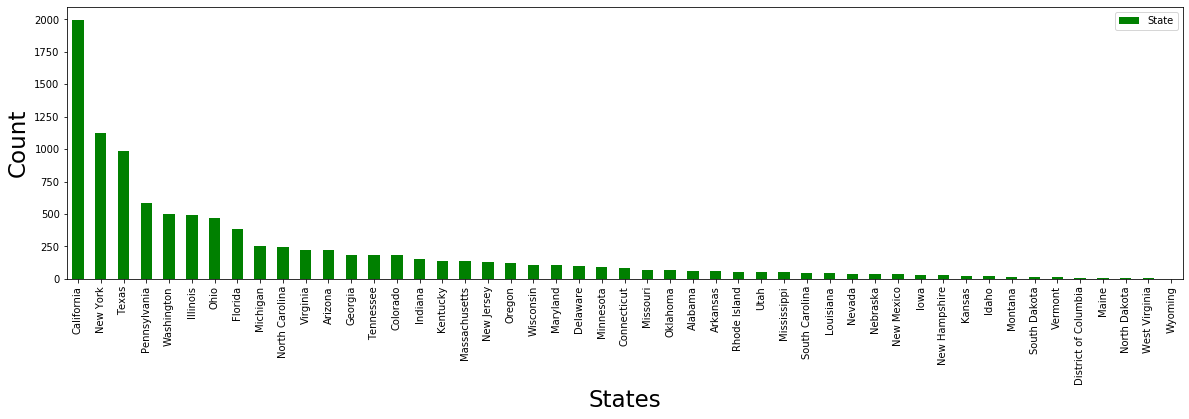

In [13]:
df.plot(kind='bar', figsize=(20, 5), color='green')
plt.xlabel('States', fontsize=23)
plt.ylabel('Count', fontsize=23)
plt.show()

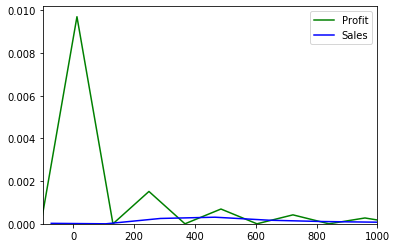

In [14]:
sns.kdeplot(dataset['Profit'], color='green', label='Profit')
sns.kdeplot(dataset['Sales'], color='blue', label='Sales')
plt.xlim([-100, 1000])
plt.legend()

###  Here we can see that the profit is much more that the sales, but there are some region where we can try to increase the profit

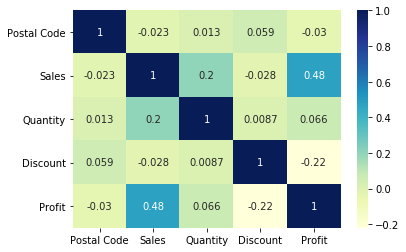

In [15]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

### The correlation between the features are as follows : 
- 'Discount' and 'Postal code' are least correlated in short negetively correlated.
- We can clealy observe that 'Sales' and 'Profit' are the most correlated features. So increase in sales will also increase in profit.

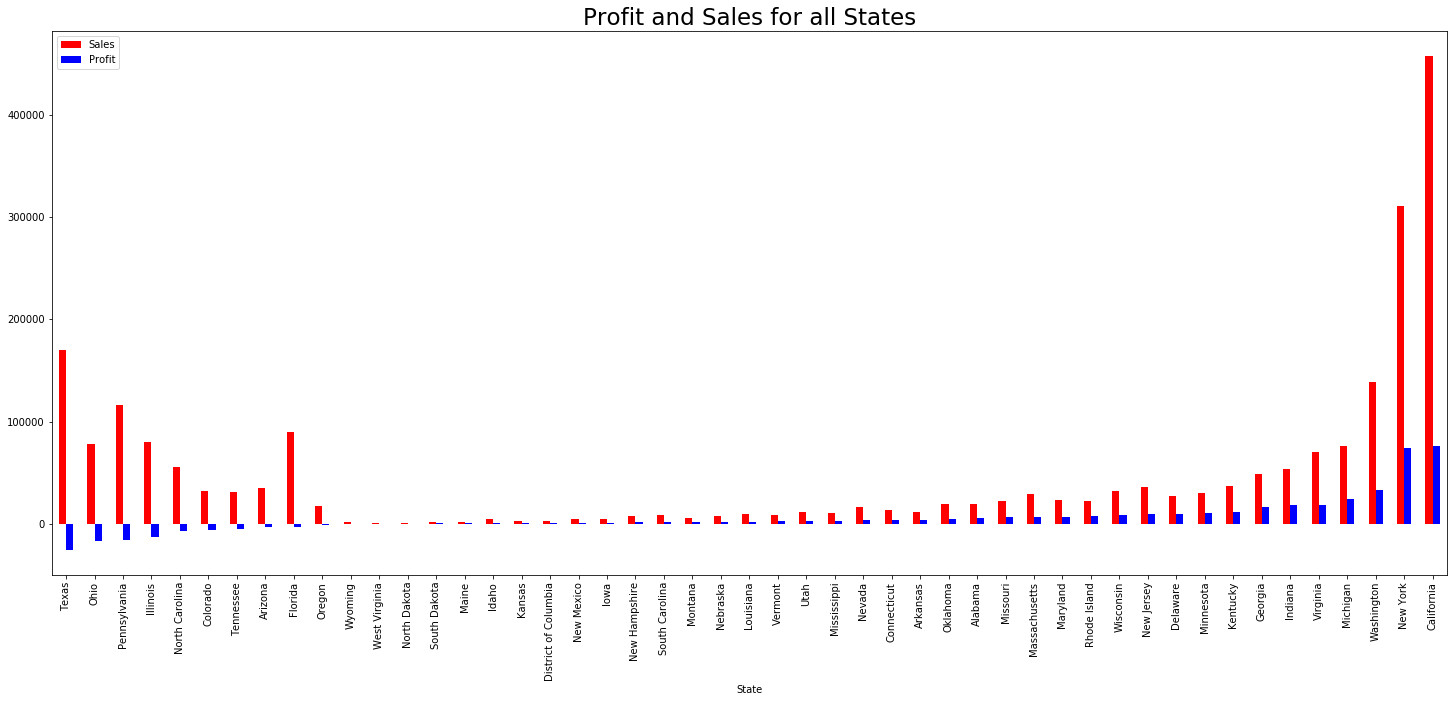

In [16]:
plt.rcParams["figure.figsize"] = [25, 10]
dataset.groupby("State")[["Sales", "Profit"]].sum().sort_values(
    by="Profit").plot(kind="bar", color=["red", "blue"])
plt.title("Profit and Sales for all States", fontsize=23)
plt.show()

In [17]:
dataset.groupby('State')[['Discount', 'Profit']].sum(
).sort_values(by="Discount", ascending=False).head()

,Discount,Profit
State,,
Texas,364.24,-25750.9833
Pennsylvania,192.70,-15565.4035
Illinois,191.10,-12601.6500
Ohio,152.10,-16959.3178
California,145.60,76330.7891


In [18]:
dataset.groupby('State')[['Discount', 'Profit']].sum(
).sort_values(by="Discount", ascending=False).tail()

,Discount,Profit
State,,
Maine,0.0,454.4862
North Dakota,0.0,230.1497
Minnesota,0.0,10823.1874
Mississippi,0.0,3172.9762
Alabama,0.0,5786.8253


- From the above to tables we can observe that the states which are offered with higher discounts are contributing less in profits

## Profit and Sales plots for each feature

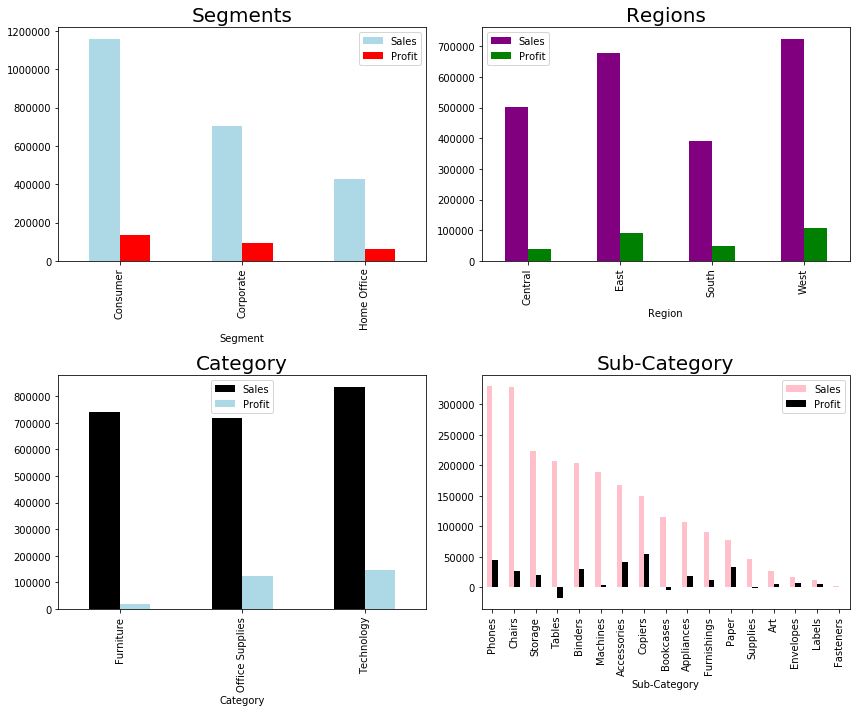

In [19]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(30, 30))
dataset.groupby('Segment')[['Sales', 'Profit']].sum().plot.bar(
    color=['lightblue', 'red'], figsize=(12, 10), ax=axs[0][0])
axs[0][0].set_title('Segments', fontsize=20)

dataset.groupby('Region')[['Sales', 'Profit']].sum().plot.bar(
    color=['purple', 'green'], figsize=(12, 10), ax=axs[0][1])
axs[0][1].set_title('Regions', fontsize=20)

dataset.groupby('Category')[['Sales', 'Profit']].sum().plot.bar(
    color=['Black', 'lightBlue'], figsize=(12, 10), ax=axs[1][0])
axs[1][0].set_title('Category', fontsize=20)

dataset.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales',
                                                                       ascending=False).plot.bar(color=['pink', 'Black'], figsize=(12, 10), ax=axs[1][1])
axs[1][1].set_title('Sub-Category', fontsize=20)
plt.tight_layout()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E67CEE0AC8>,
      dtype=object)

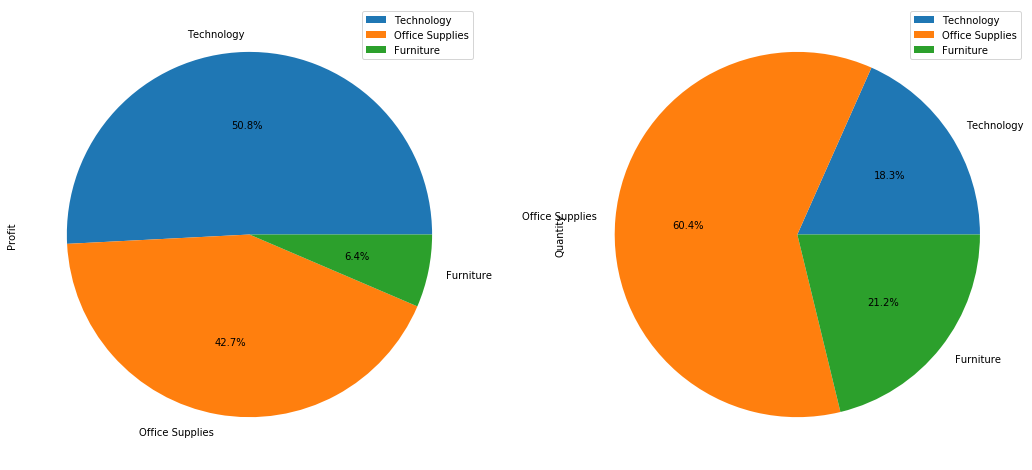

In [20]:
dataset.groupby('Category')[['Profit', 'Quantity']].sum().sort_values(
    by="Profit", ascending=False).plot.pie(subplots=True, figsize=(18, 18), autopct='%1.1f%%')

- Sales related to technology gives more profit, and the quantity of sales of other supplies is more.

In [21]:
dataset.groupby('Sub-Category')[['Profit', 'Quantity']
                                ].sum().sort_values(by="Profit", ascending=False)

,Profit,Quantity
Sub-Category,,
Copiers,55617.8249,234
Phones,44515.7306,3289
Accessories,41936.6357,2976
Paper,33944.2395,5144
Binders,30228.0003,5971
Chairs,26567.1278,2351
Storage,21278.8264,3158
Appliances,18138.0054,1729
Furnishings,13052.7230,3560


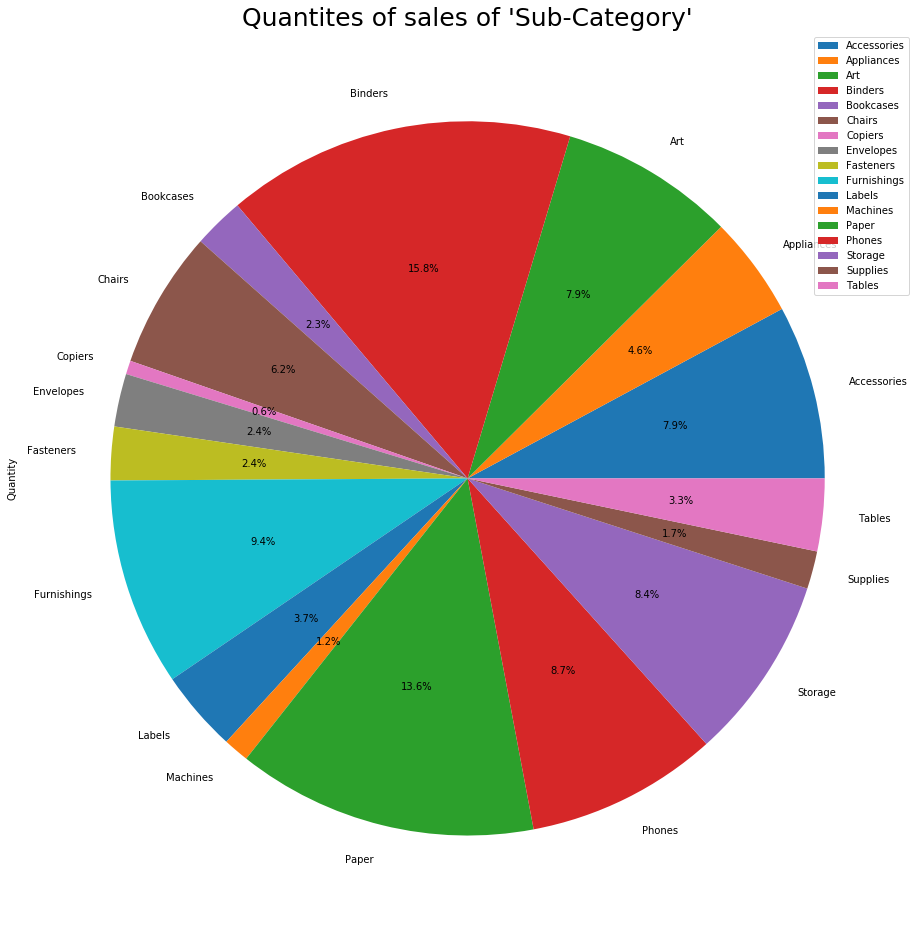

In [22]:
dataset.groupby('Sub-Category')[['Quantity']].sum().plot.pie(
    subplots=True, figsize=(16, 32), autopct='%1.1f%%')
plt.title('Quantites of sales of \'Sub-Category\'', fontsize=25)
plt.show()

- The profit gained by tables, bookcase and Supplies is very low, in fact we are getting loss from thier sales. So we can reduce thier supply rate.
- We should increase the sales of Copiers to gain more profit.

## Observations - 

- Profit is more where sales is done but there are some places where we can increase profit.
- `New-York`, `California` and `Washington` are the top 3 states with max-profit as per thier sales.
- 'Sales' and 'Profit' are the most correlated features. So increase in sales will also increase in profit.
- 'Discount' and 'Postal code' are least correlated in short negetively correlated.
- The states with high sales are generating less profits according to discounts offered to them. Profit and Discount are negetively related with each other.
- The profit gained by technology products are high so we should increase the sale of it.
- In Sub-Category, 'Copiers' gives more profit so we should increase the quantity of its sale. 